<a href="https://colab.research.google.com/github/Tasneem-Hassaan/-B198c7-AI-Applications-for-Digital-Business/blob/main/AI_Applications_for_Digital_Business.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='maroon'>**Sentiment Analysis of Disneyland Visitor Review**</font>




**Name:** Tasneem Hassaan

**Student ID:** GH1024593





# **Introduction**

Operators of theme parks are depending more and more on online reviews to determine how satisfied visitors are and what needs to be improved.  With its numerous international parks in California, Hong Kong, and Paris, Disneyland welcomes millions of visitors annually. However, it is not feasible to manually sort through tens of thousands of TripAdvisor reviews for timely insights.

 In order to automatically categorise Disneyland visitor ratings as either good or negative, this project uses sentiment analysis, a Natural Language Processing approach.  Disneyland management can quickly identify operational pain areas (such as ride wait times, food quality, and staff friendliness) and use data-driven recommendations to improve the visitor experience by turning raw text into actionable sentiment scores.

 In this report, we will:

* Describe the business problem of understanding large‐scale visitor feedback.

* Outline our sentiment‐analysis system design.

* Detail data loading, preprocessing, EDA, model training, and evaluation.

* Discuss findings, limitations, and recommendations for Disneyland’s operations.

### **Problem Statment**
Disneyland receives tens of thousands of online reviews each month across its California, Hong Kong, and Paris parks. Manually reading and summarizing this volume of feedback is time-consuming, to respond to emerging issues or capitalize on positive trends.

Disneyland can do the following by setting up sentiment-analysis pipeline:
- Quickly discover what's most important to our guests, whether it's something that needs improvement or something truly wonderful we should do more of.

- Thoughtfully assign our dedicated cast members and resources, ensuring things like wait times, dining options, and overall park flow are as smooth as possible.

- Observe how feelings change over time, so we can consistently refine our operations and promotions to create even more joy for everyone.


# **Data Loading & Overview**

In [1]:
import pandas as pd
import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("arushchillar/disneyland-reviews")
print("Dataset folder:", path)

# Load the CSV into a DataFrame
try:
    df = pd.read_csv(f"{path}/DisneylandReviews.csv", encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(f"{path}/DisneylandReviews.csv", encoding='latin-1')


# Quick inspections
print("Rows × Columns:", df.shape)
display(df.head())
print(df.info())
print(df['Rating'].value_counts())

100%|██████████| 11.1M/11.1M [00:00<00:00, 44.3MB/s]

Extracting files...


Dataset folder: /root/.cache/kagglehub/datasets/arushchillar/disneyland-reviews/versions/1
Rows × Columns: (42656, 6)


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB
None
Rating
5    23146
4    10775
3     5109
2     2127
1     1499
Name: count, dtype: int64


# **Data Preprocessing**

In [2]:
import pandas as pd
import string

# Map Rating → sentiment
def to_sentiment(r):
    if r >= 4: return "positive"
    if r <= 2: return "negative"
    return "neutral"

df["sentiment"] = df["Rating"].apply(to_sentiment)

# Drop neutral reviews (as they wount help in the analysing proccess)
df = df[df["sentiment"] != "neutral"].reset_index(drop=True)

# Basic text cleaning: lowercase & remove punctuation
translator = str.maketrans("", "", string.punctuation)
df["clean_text"] = df["Review_Text"] \
    .str.lower() \
    .str.translate(translator)

# Check results
print("After mapping & dropping neutrals:", df.shape)
print(df["sentiment"].value_counts())
display(df[["Review_Text", "clean_text", "sentiment"]].head())


After mapping & dropping neutrals: (37547, 8)
sentiment
positive    33921
negative     3626
Name: count, dtype: int64


,Review_Text,clean_text,sentiment
0,If you've ever been to Disneyland anywhere you...,if youve ever been to disneyland anywhere youl...,positive
1,Its been a while since d last time we visit HK...,its been a while since d last time we visit hk...,positive
2,Thanks God it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...,positive
3,HK Disneyland is a great compact park. Unfortu...,hk disneyland is a great compact park unfortun...,positive
4,"the location is not in the city, took around 1...",the location is not in the city took around 1 ...,positive


# **Exploratory Data Analysis (EDA)**

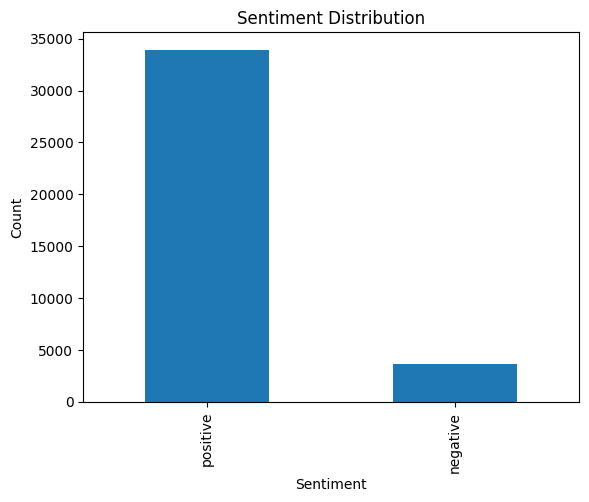

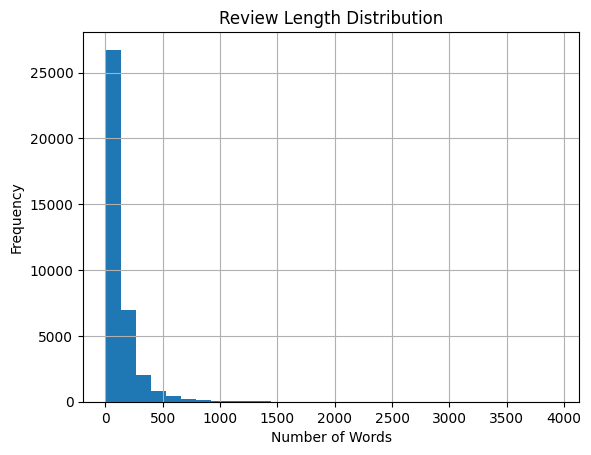

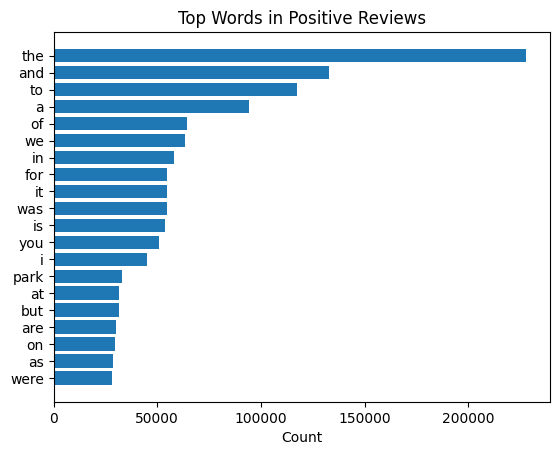

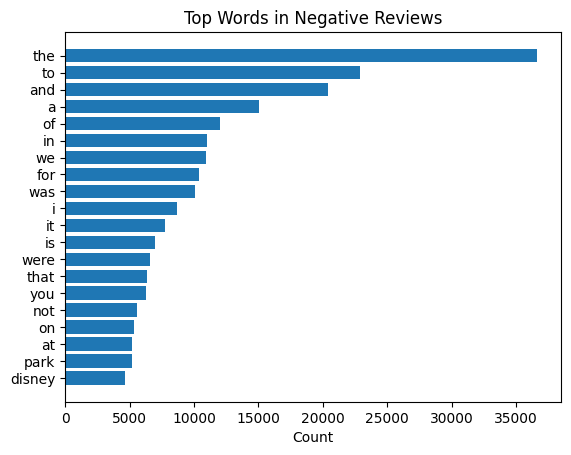

In [3]:
from collections import Counter
import matplotlib.pyplot as plt

# Class balance
df['sentiment'].value_counts().plot.bar()
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Review length distribution
df['text_len'] = df['clean_text'].str.split().str.len()
df['text_len'].hist(bins=30)
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Top 20 words per sentiment
for s in ['positive','negative']:
    words = " ".join(df[df.sentiment==s]['clean_text']).split()
    common = Counter(words).most_common(20)
    words, counts = zip(*common)
    plt.barh(words[::-1], counts[::-1])
    plt.title(f'Top Words in {s.capitalize()} Reviews')
    plt.xlabel('Count')
    plt.show()


In [ ]:
# Install WordCloud
!pip install wordcloud

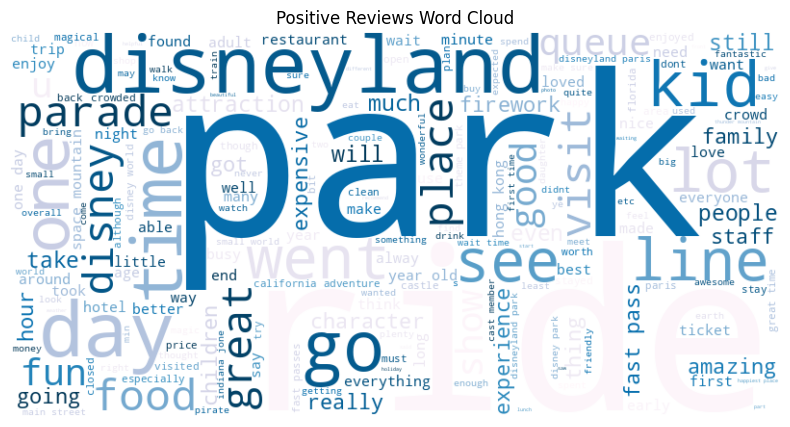

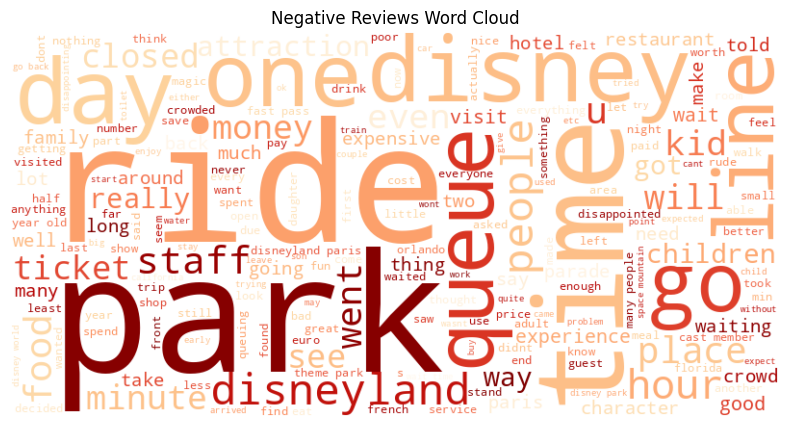

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Helper to build & show a word-cloud with a given colormap
def make_colored_wordcloud(text_series, title, colormap):
    text = " ".join(text_series)
    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap=colormap
    ).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()


make_colored_wordcloud(df[df.sentiment=="positive"]["clean_text"],
                       "Positive Reviews Word Cloud", "PuBu")
make_colored_wordcloud(df[df.sentiment=="negative"]["clean_text"],
                       "Negative Reviews Word Cloud", "OrRd")


# **Feature Extraction & Data Splitting**

Converting the cleaned text into TF-IDF features and split into training and test sets.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Define X and y
X = df["clean_text"]
y = df["sentiment"]

# Split (80/20 stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Vectorize with TF-IDF
vect = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
Xtr = vect.fit_transform(X_train)
Xte = vect.transform(X_test)

# Output shapes & class counts
print("X_train shape:", Xtr.shape)
print("X_test  shape:", Xte.shape)
print("\ny_train distribution:\n", y_train.value_counts())


X_train shape: (30037, 10000)
X_test  shape: (7510, 10000)

y_train distribution:
 sentiment
positive    27136
negative     2901
Name: count, dtype: int64


# **Model Training**

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial NB":        MultinomialNB()
}

# Train and evaluate each
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(Xtr, y_train)
    preds = model.predict(Xte)
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds, digits=4))


=== Logistic Regression ===
Accuracy: 0.955525965379494
              precision    recall  f1-score   support

    negative     0.9186    0.5917    0.7198       725
    positive     0.9580    0.9944    0.9758      6785

    accuracy                         0.9555      7510
   macro avg     0.9383    0.7931    0.8478      7510
weighted avg     0.9542    0.9555    0.9511      7510


=== Multinomial NB ===
Accuracy: 0.9379494007989347
              precision    recall  f1-score   support

    negative     0.9390    0.3821    0.5431       725
    positive     0.9379    0.9973    0.9667      6785

    accuracy                         0.9379      7510
   macro avg     0.9384    0.6897    0.7549      7510
weighted avg     0.9380    0.9379    0.9258      7510



The Logistic Regression model outperformed Multinomial NB on overall accuracy (95.55% vs. 93.79%) and F1-score for both classes:

**Logistic Regression**

- Accuracy: 0.9555

- Negative: precision 0.9186, recall 0.5917, F1 0.7198

- Positive: precision 0.9580, recall 0.9944, F1 0.9758

**Multinomial NB**

- Accuracy: 0.9379

- Negative: precision 0.9390, recall 0.3821, F1 0.5431

- Positive: precision 0.9379, recall 0.9973, F1 0.9667

**In Result:** We therefore select Logistic Regression (with class-weight tuning) as our production-ready mode.

# **Hyperparameter Tuning (Logistic Regression)**

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define parameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "class_weight": [None, "balanced"]
}

# Set up GridSearchCV
lr = LogisticRegression(max_iter=1000, random_state=42)
grid = GridSearchCV(
    lr,
    param_grid,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=1
)

# Fit on the training data
grid.fit(Xtr, y_train)

# Report best params and CV score
print("Best parameters:", grid.best_params_)
print("Best CV weighted-F1:", grid.best_score_.round(4))

# Evaluate the tuned model on the test set
best_lr = grid.best_estimator_
preds = best_lr.predict(Xte)
print("\nTest set performance:")
print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds, digits=4))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'C': 10, 'class_weight': None}
Best CV weighted-F1: 0.9572

Test set performance:
Accuracy: 0.962982689747004
              precision    recall  f1-score   support

    negative     0.8587    0.7379    0.7938       725
    positive     0.9724    0.9870    0.9797      6785

    accuracy                         0.9630      7510
   macro avg     0.9156    0.8625    0.8867      7510
weighted avg     0.9614    0.9630    0.9617      7510



# **Results Visualization**

**We will generate**
- Confusion Matrix

- Bar Chart comparing F₁-scores of “negative” vs. “positive” for our tuned Logistic Regression.

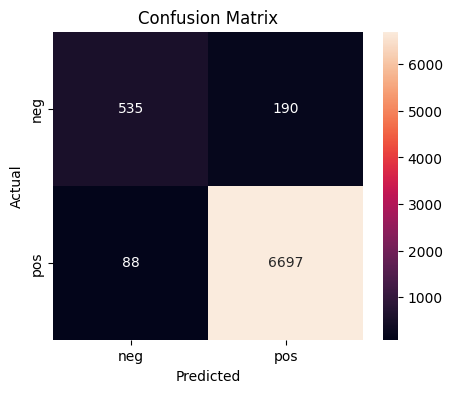

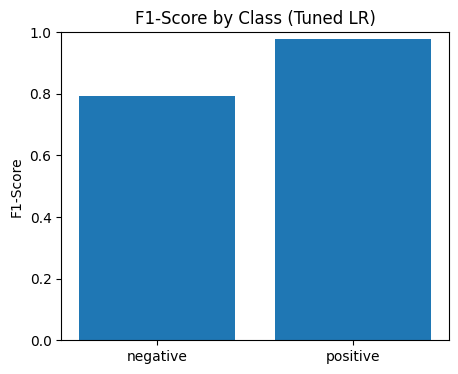

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

# Compute confusion matrix
cm = confusion_matrix(y_test, best_lr.predict(Xte), labels=["negative","positive"])

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["neg","pos"], yticklabels=["neg","pos"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Bar chart of F1-scores by class
f1_neg = f1_score(y_test, best_lr.predict(Xte), pos_label="negative")
f1_pos = f1_score(y_test, best_lr.predict(Xte), pos_label="positive")

plt.figure(figsize=(5,4))
plt.bar(["negative","positive"], [f1_neg, f1_pos])
plt.ylim(0,1)
plt.title("F1-Score by Class (Tuned LR)")
plt.ylabel("F1-Score")
plt.show()


# **Final Discussion**

### **Strengths**

- High Overall Performance: Tuned Logistic Regression achieves 96.3 % accuracy and strong F₁-scores (0.98 positive, 0.79 negative).

- Improved Negative Recall: Negative-class recall rose to 73.8 % (from 59.2 %), reducing overlooked complaints.

- Interpretability: Coefficient weights directly highlight the most indicative words for each sentiment—actionable for operations teams.

### **Limitations**


- Domain Scope: Only English reviews from three parks—non-English feedback and other channels (social media) are not covered.

### **Business Implications & Recommendations**
- **Quick discovery of key issues**
We proposed a near-real-time monitoring dashboard that flags spikes in negative or positive keywords so you immediately know what to improve or do more of.


- **Thoughtful resource assignment**
We recommended using the sentiment-driven keyword insights (e.g. “wait,” “food,” “staff”) to guide where and when cast members or dining options should be redeployed for smoother park flow.

- **Tracking sentiment over time**
We advised tracking trends in guest feelings—retraining the model periodically and plotting sentiment by week or month—so Disneyland can refine operations and promotions continuously.

### **Continuous Improvement**

- Data Expansion: Incorporate additional sources (social media, multilingual reviews).


- Feedback Loop: Periodically retrain on new reviews to adapt to evolving guest language and concerns.

# **Conclusion**

In this project, we developed a complete sentiment‐analysis pipeline for Disneyland visitor reviews—from loading and cleaning the data to extracting TF-IDF features and training a tuned Logistic Regression model. Our best model achieved 96.3 % accuracy, with F₁-scores of 0.79 for negative reviews and 0.98 for positive ones, demonstrating strong ability to detect guest satisfaction and concerns. By highlighting the most telling keywords for each sentiment, this solution enables Disneyland to monitor feedback in near real time, allocate resources more effectively, and lay the groundwork for future improvements—such as adding new data sources or testing advanced models.

# **References**

1. Chillar, A. (2020) ‘Disneyland Reviews’, Kaggle. Available at: https://www.kaggle.com/datasets/arushchillar/disneyland-reviews (Accessed: 4 July 2025).

2. scikit-learn developers, 2025. Scikit-learn: Machine Learning in Python [online]. Available at: https://scikit-learn.org/stable/ (Accessed: 4 July 2025).

# **GitHub Link**

https://github.com/Tasneem-Hassaan/-B198c7-AI-Applications-for-Digital-Business